In [0]:
from keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from keras import datasets #mnist
from keras.utils import np_utils #to_categorical

**분산 방식 모델링을 포함하는 함수형으로 구현**

In [0]:
def ANN_models_func(Nin, Nh, Nout):
  x = layers.Input(shape=(Nin,)) # 입력 계층- 원소 Nin개
  h = layers.Activation('relu')(layers.Dense(Nh)(x)) # 은닉 계층 - 노드가 Nh개
  y = layers.Activation('softmax')(layers.Dense(Nout)(h)) #출력 노드 - Nout ()클래스 수)
  model = models.Model(x,y)
  model.compile(loss='categorical_crossentopy',optimizer='adam',metrics=['accuracy'])
  return model

**연쇄 방식 모델링을 포함하는 함수형 구현**



In [0]:
def ANN_seq_func(Nin, Nh, Nout):
  model = models.Sequential() 
  model.add(layers.Dense(Nh, activation='relu', input=(Nin,))) #입력 계층과 은닉 계층의 형태가 동시에 정해짐
  model.add(layers.Dense(Nout, activation='softmax')) #출력
  model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  return model  


**분산 방식 모델링을 포함하는 객체지향형 구현**

1.재사용

2.일반 사용자는 전문가가 만든 인공지능 모델을 객체로 불러 쉽게 활용할 수 있는 장점이 있음

In [0]:
class ANN_models_class(models.Model):
  def __init__(self, Nin,Nh, Nout):
    #Prepare network layers and activate functions
    hidden = layers.Dense(Nh)
    output = layers.Dense(Nout)
    relu = layers.Activation('relu')
    softmax = layers.Activation('softmax')
    
    #connect network elements
    x = layers.Input(shape=(Nin,))
    h=relu(hidden(x))
    y=softmax(output(h))
    
    super().__init__(x,y)
    self.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    

**연쇄 방식 모델링을 포함하는 객체지향형 구현**

In [0]:
class ANN_seq_class(models.Sequential):
  def __init__(self, Nin, Nh, Nout):
    super().__init__()
    self.add(layers.Dense(Nh,activation='relu',input_shape=(Nin,)))
    self.add(layers.Dense(Nout, activation='softmax'))
    self.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

**Load data**

In [0]:
def Data_func():
  (X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()
  
  Y_train = np_utils.to_categorical(y_train)
  Y_test = np_utils.to_categorical(y_test)
  
  L,W,H = X_train.shape
  X_train= X_train.reshape(-1,W*H)
  X_test= X_test.reshape(-1,W*H)
  
  X_train = X_train / 255.0
  X_test = X_test/ 255
  
  return (X_train, Y_train),(X_test, Y_test)

**Graph**

In [0]:
def plot_acc(history, title=None):
    # summarize history for accuracy
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['acc'])
    plt.plot(history['val_acc'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)
    # plt.show()

In [0]:
def plot_loss(history, title=None):
    # summarize history for loss
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)
    # plt.show()

**분류 ANN 학습 및 성능 분석**

In [0]:
def main():
  Nin = 784
  Nh = 100 
  number_of_class = 10
  Nout = number_of_class
  
  model = ANN_seq_class(Nin, Nh, Nout)
  (X_train, Y_train),(X_test,Y_test) = Data_func()
  
  #Training
  history=model.fit(X_train, Y_train, epochs=15, batch_size=100, validation_split=0.2)
  performance_test = model.evaluate(X_test, Y_test, batch_size=100)
  
  plot_loss(history)
  plt.show()
  plot_acc(history)
  plt.show()


In [0]:
if __name__=='__main__':
  main()

**Run code**

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 3s 66us/step - loss: 0.3960 - acc: 0.8914 - val_loss: 0.2114 - val_acc: 0.9409
Epoch 2/15
48000/48000 [==============================] - 3s 60us/step - loss: 0.1858 - acc: 0.9473 - val_loss: 0.1609 - val_acc: 0.9528
Epoch 3/15
48000/48000 [==============================] - 3s 63us/step - loss: 0.1376 - acc: 0.9606 - val_loss: 0.1383 - val_acc: 0.9604
Epoch 4/15
48000/48000 [==============================] - 3s 64us/step - loss: 0.1076 - acc: 0.9687 - val_loss: 0.1240 - val_acc: 0.9634
Epoch 5/15
48000/48000 [==============================] - 3s 63us/step - loss: 0.0884 - acc: 0.9746 - val_loss: 0.1063 - val_acc: 0.9678
Epoch 6/15
48000/48000 [==============================] - 3s 64us/step - loss: 0.0731 - acc: 0.9788 - val_loss: 0.1018 - val_acc: 0.9687
Epoch 7/15
48000/48000 [==============================] - 3s 64us/step - loss: 0.0619 - acc: 0.9821 - val_loss: 0.0956 - val_acc

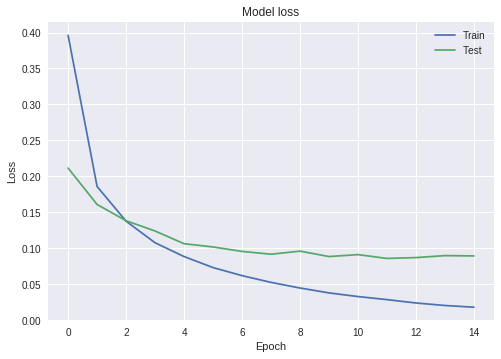

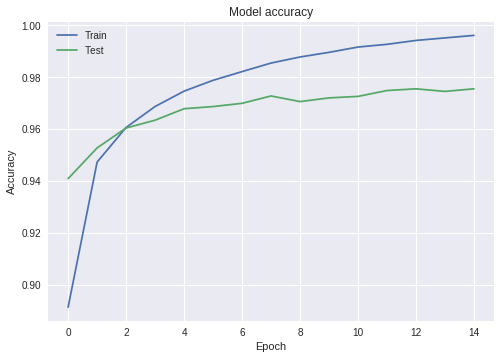

In [55]:
if __name__=='__main__':
  main()